In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingRegressor
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

# Reading and preparing csv files

Mounting the datasets from google drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First , we use pandas to read the csv files

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Mining Project/contentDataPrime.csv")
genre_df =  pd.read_csv("/content/drive/MyDrive/Data Mining Project/contentDataGenre.csv")
region_df = pd.read_csv("/content/drive/MyDrive/Data Mining Project/contentDataRegion.csv")

Next we'll merge the dataframes , so there will be a region and genre column in the prime_df

In [ ]:
df = df.merge(region_df.groupby('dataId')['region'].apply(list).reset_index(), on='dataId', how='left')
df = df.merge(genre_df.groupby('dataId')['genre'].apply(list).reset_index(), on='dataId', how='left')
df

,dataId,contentType,title,length,releaseYear,endYear,votes,rating,gross,certificate,description,region,genre
0,102795,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,NaN,"The story revolves around Mohanasundaram, a re...",[India],[Drama]
1,102796,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...,[United States],"[Documentary, Comedy]"
2,102797,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n,[United States],"[Documentary, Horror]"
3,102798,movie,Don't Look,71,2018,-1,349,2.8,-1,NaN,"In the tradition of classic horror movies, ""Do...",[United States],[Horror]
4,102799,movie,The Escape from Auschwitz,80,2020,-1,349,1.7,-1,TV-MA,After capturing Kazimierz Piechowski at the Hu...,[United Kingdom],"[Drama, War]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101600,497,tvSeries,The Man in the High Castle,60,2015,2019,103828,7.9,-1,TV-MA,In a dystopian America dominated by Nazi Germa...,"[United States, United Kingdom, Canada]","[Drama, Sci-Fi, Thriller]"
101601,498,tvSeries,Justified,44,2010,2015,103427,8.6,-1,TV-MA,U.S. Marshal Raylan Givens is reassigned from ...,[United States],"[Action, Crime, Drama]"
101602,499,tvSeries,Misfits,60,2009,2013,103121,8.2,-1,TV-MA,A group of young offenders doing community ser...,[United Kingdom],"[Comedy, Drama, Fantasy]"
101603,500,movie,"I, Robot",115,2004,-1,549787,7.1,144800000,PG-13,"In 2035, a technophobic cop investigates a cri...","[United States, Germany]","[Action, Mystery, Sci-Fi]"



# Exploratory data analysis





Now , we use the describe and info methods to get a good understanding of our data

In [ ]:
df.describe()

,dataId,releaseYear,endYear,votes,rating,gross
count,101605.000000,101605.000000,101605.000000,1.016050e+05,101605.000000,1.016050e+05
mean,52149.129039,1877.734924,201.788859,1.132205e+04,6.361956,3.008252e+06
std,29761.937561,479.015378,604.807306,6.084925e+04,1.315028,2.049267e+07
min,0.000000,-1.000000,-1.000000,-1.000000e+00,1.000000,-1.000000e+00
25%,26503.000000,1984.000000,-1.000000,4.550000e+02,5.700000,-1.000000e+00
50%,52491.000000,2007.000000,-1.000000,9.520000e+02,6.500000,-1.000000e+00
75%,77892.000000,2016.000000,-1.000000,3.097000e+03,7.300000,-1.000000e+00
max,103293.000000,2023.000000,2024.000000,2.715939e+06,10.000000,9.366600e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101605 entries, 0 to 101604
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dataId       101605 non-null  int64  
 1   contentType  101605 non-null  object 
 2   title        101605 non-null  object 
 3   length       101605 non-null  object 
 4   releaseYear  101605 non-null  int64  
 5   endYear      101605 non-null  int64  
 6   votes        101605 non-null  int64  
 7   rating       101605 non-null  float64
 8   gross        101605 non-null  int64  
 9   certificate  58357 non-null   object 
 10  description  101605 non-null  object 
 11  region       101605 non-null  object 
 12  genre        101605 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 10.9+ MB


Looking at our data frame , we notice that -1 and "null" are used to represent empty value . So the real count of the null values is probably higher than described by the info method . We'll want to replace those null values with Numpy NAN so we'll know how many missing values we have

In [ ]:
# Function to check and replace empty values with NumPy NAN
def replace_empty_value_with_nan(value):
    return np.nan if value in (-1, "-1", "null") else value

# convert values in length column to int
df['length'] = df['length'].str.replace(',', '').astype('int64')

# apply replace_empty_value_with_nan function to df
df = df.applymap(replace_empty_value_with_nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101605 entries, 0 to 101604
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dataId       101605 non-null  int64  
 1   contentType  101605 non-null  object 
 2   title        101605 non-null  object 
 3   length       93894 non-null   float64
 4   releaseYear  95416 non-null   float64
 5   endYear      10269 non-null   float64
 6   votes        101604 non-null  float64
 7   rating       101605 non-null  float64
 8   gross        14649 non-null   float64
 9   certificate  58357 non-null   object 
 10  description  101605 non-null  object 
 11  region       101605 non-null  object 
 12  genre        101605 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 10.9+ MB


In [ ]:
df.describe()

,dataId,length,releaseYear,endYear,votes,rating,gross
count,101605.000000,93894.000000,95416.000000,10269.000000,1.016040e+05,101605.000000,1.464900e+04
mean,52149.129039,89.384199,1999.595938,2005.462362,1.132216e+04,6.361956,2.086515e+07
std,29761.937561,60.213397,23.279797,15.212239,6.084954e+04,1.315028,5.040152e+07
min,0.000000,1.000000,1874.000000,1952.000000,1.020000e+02,1.000000,0.000000e+00
25%,26503.000000,61.000000,1991.000000,1998.000000,4.550000e+02,5.700000,1.600000e+05
50%,52491.000000,91.000000,2008.000000,2010.000000,9.520000e+02,6.500000,1.980000e+06
75%,77892.000000,106.000000,2016.000000,2017.000000,3.097000e+03,7.300000,1.882000e+07
max,103293.000000,5220.000000,2023.000000,2024.000000,2.715939e+06,10.000000,9.366600e+08


Looks like the length, votes and gross columns may have some outliers. we'll use matplotlib to visualize the data

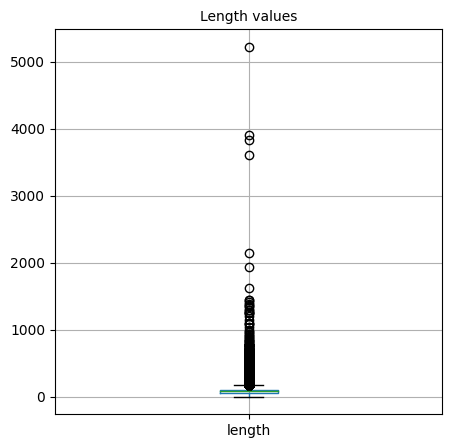

In [ ]:
num_cols = ['length']
plt.figure(figsize=(5,5))
df[num_cols].boxplot()
plt.title("Length values", fontsize=10)
plt.show()

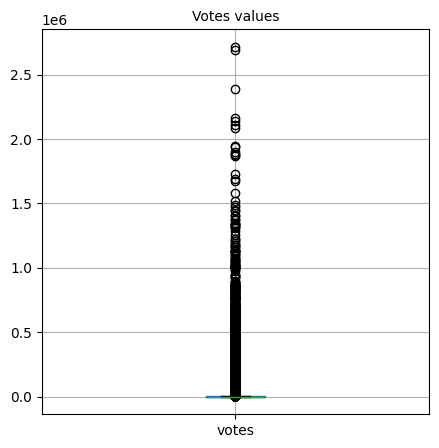

In [ ]:
num_cols = ['votes']
plt.figure(figsize=(5,5))
df[num_cols].boxplot()
plt.title("Votes values", fontsize=10)
plt.show()

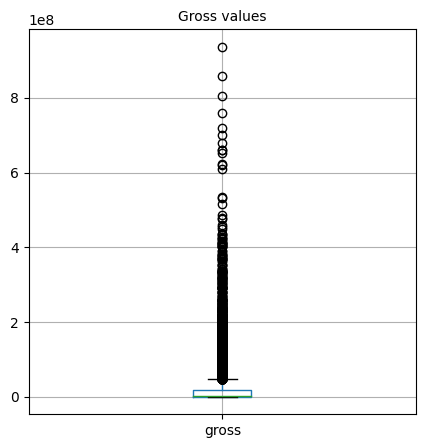

In [ ]:
num_cols = ['gross']
plt.figure(figsize=(5,5))
df[num_cols].boxplot()
plt.title("Gross values", fontsize=10)
plt.show()

# Preprocessing



## Pipeline :
1.   Feature selection
2.   Feature engineering :
  *   Create a new column - weighted rating
  *   Group values in certificate column
  *   One-hot encoding of categorcial columns
3. Handling missing values and outliers - using regression
4. Normalization / scaling - bring numeric columns to the same range
5. Checking Information gain and scaling

## Feature selection
We'll drop the data ID , title and description columns , they are not needed for us

In [ ]:
df = df.drop(columns=['dataId','title', 'description'])
df.columns

Index(['contentType', 'length', 'releaseYear', 'endYear', 'votes', 'rating',
       'gross', 'certificate', 'region', 'genre'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101605 entries, 0 to 101604
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   contentType  101605 non-null  object 
 1   length       93894 non-null   float64
 2   releaseYear  95416 non-null   float64
 3   endYear      10269 non-null   float64
 4   votes        101604 non-null  float64
 5   rating       101605 non-null  float64
 6   gross        14649 non-null   float64
 7   certificate  58357 non-null   object 
 8   region       101605 non-null  object 
 9   genre        101605 non-null  object 
dtypes: float64(6), object(4)
memory usage: 8.5+ MB


## Feature engineering



### Create a new column - weighted rating

In [ ]:
df['weight'] = (df['votes'] / df['votes'].sum()) * 10000
df['weighted_rating'] = df['rating'] * df['weight']
df.dropna(subset=['votes'], inplace=True)

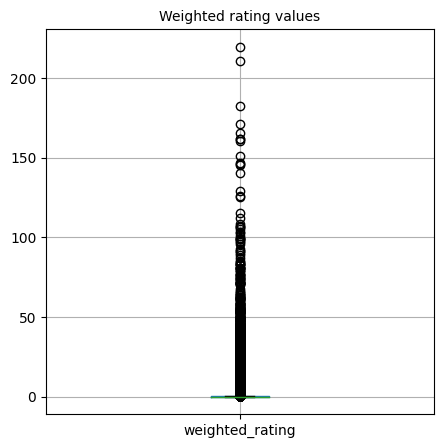

In [ ]:
num_cols = ['weighted_rating']
plt.figure(figsize=(5,5))
df[num_cols].boxplot()
plt.title("Weighted rating values", fontsize=10)
plt.show()

In [ ]:
df['weighted_rating'].describe()

count    101604.000000
mean          0.704442
std           4.231139
min           0.001069
25%           0.023646
50%           0.050696
75%           0.170947
max         219.564780
Name: weighted_rating, dtype: float64

Create rating category column so the data will fit the model , the different models will determine whether the entry's rating is low , medium or high (presented as : 0 - low , 1 - medium , 2 - high)

In [ ]:
# Define the quartile values
q1 = df['weighted_rating'].quantile(0.25)
q2 = df['weighted_rating'].quantile(0.50)
q3 = df['weighted_rating'].quantile(0.75)

# Categorize 'weighted_rating' based on quartiles
df['rating_category'] = pd.cut(df['weighted_rating'], bins=[-float('inf'), q1, q2, float('inf')], labels=[0, 1, 2])

We'll drop these columns because we made rating_category column

In [ ]:
df = df.drop(['votes', 'rating', 'weight', 'weighted_rating'], axis=1)

### Group values

Let's take a closer look at the certificate column

In [ ]:
df['certificate'].unique()

array([nan, 'Not Rated', 'Unrated', 'TV-MA', 'PG', 'Passed', 'R', 'TV-14',
       'Approved', 'PG-13', 'TV-PG', 'TV-G', 'G', 'GP', 'X', 'TV-Y7-FV',
       'TV-Y7', 'M', 'TV-Y', 'M/PG', '16+', '18+', 'F', 'NC-17', '18',
       'EM', 'AO', 'TV-13', '13+', 'Open', 'E', 'E10+', 'T', 'MA-17',
       '12'], dtype=object)

We'll try to group similar certificates :

* 'TV-Y7-FV', 'TV-Y7', 'TV-Y', 'TV-G', 'G', 'E', 'T' ,'PG', 'TV-PG', 'E10+', 'Passed', 'Approved'  => All Ages

* 'PG-13', 'M/PG', 'TV-13', '13+', '12' , 'TV-14', 'GP', 'M' => Teen

* 'TV-MA', 'MA-17', '16+', '18+', '18', 'NC-17', 'R', 'X', => Adults

* nan, 'Not Rated', 'Unrated', 'Open', 'F', 'EM', 'AO'  => 'Unknown'

In [ ]:
group_mapping = {
    'TV-Y7-FV': 'All Ages', 'TV-Y7': 'All Ages', 'TV-Y': 'All Ages', 'TV-G': 'All Ages', 'G': 'All Ages', 'E': 'All Ages', 'T': 'All Ages',
    'PG': 'All Ages', 'TV-PG': 'All Ages', 'E10+': 'All Ages', 'Passed': 'All Ages', 'Approved': 'All Ages',

    'PG-13': 'Teen','M/PG': 'Teen','TV-13': 'Teen','Teen': 'Teen','12': 'Teen','TV-14': 'Teen','GP': 'Teen', 'M': 'Teen',

    'TV-MA': 'Adults','MA-17': 'Adults','16+': 'Adults','18+': 'Adults','18': 'Adults','NC-17': 'Adults','R': 'Adults','X': 'Adults',

    'Not Rated': 'Unknown','Unrated': 'Unknown','Open': 'Unknown','F': 'Unknown','EM': 'Unknown','AO': 'Unknown'}

df['certificate'] = df['certificate'].map(group_mapping)
df['certificate'] = df['certificate'].fillna('Unknown')

df['certificate'].unique()

array(['Unknown', 'Adults', 'All Ages', 'Teen'], dtype=object)

### One-Hot Encoding

We'll one-hot encoding of categorcial columns

In [ ]:
columns_to_encode = ['contentType', 'certificate']
df = pd.get_dummies(df, columns=columns_to_encode)

This time we're choosing the top 3 categories

In [ ]:
country_counts = df['region'].apply(pd.Series).stack().value_counts()

selected_countries = country_counts.head(5).index
for country in selected_countries:
    column_name = f"region_{country}"
    df[column_name] = df['region'].apply(lambda x: 1 if country in x else 0)

df['region_other'] = df['region'].apply(lambda x: 1 if not any(country in x for country in selected_countries) else 0)

In [ ]:
genre_counts = df['genre'].apply(pd.Series).stack().value_counts()

selected_genres = genre_counts.head(5).index
for genre_type in selected_genres:
    column_name = f"genre_{genre_type}"
    df[column_name] = df['genre'].apply(lambda x: 1 if genre_type in x else 0)

df['genre_other'] = df['genre'].apply(lambda x: 1 if not any(genre_type in x for genre_type in selected_genres) else 0)

In [ ]:
df = df.drop(columns=['genre','region'])

In [ ]:
df.columns

Index(['length', 'releaseYear', 'endYear', 'gross', 'rating_category',
       'contentType_movie', 'contentType_tvSeries', 'certificate_Adults',
       'certificate_All Ages', 'certificate_Teen', 'certificate_Unknown',
       'region_United States', 'region_United Kingdom', 'region_France',
       'region_India', 'region_Canada', 'region_other', 'genre_Drama',
       'genre_Comedy', 'genre_Romance', 'genre_Action', 'genre_Crime',
       'genre_other'],
      dtype='object')

We'll change the new columns' dtype to category

In [ ]:
for column in df.columns:
  if column.startswith('contentType') or column.startswith('certificate') or column.startswith('region') or column.startswith('genre'):
    df[column] = df[column].astype('category')

## Handling missing values and outliers
There seems to be a lot of missing values in this dataframe , let's look at the percentage of missing values in each column

In [ ]:
missing_data_prime = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum() / len(df)) * 100})
missing_data_prime

,total_missing,perc_missing
length,7711,7.589268
releaseYear,6189,6.091296
endYear,91335,89.893114
gross,86955,85.582261
rating_category,0,0.000000
contentType_movie,0,0.000000
contentType_tvSeries,0,0.000000
certificate_Adults,0,0.000000
certificate_All Ages,0,0.000000
certificate_Teen,0,0.000000


We'll use HistGradientBoostingRegressor model to try and predict the missing values and outliers , first we'll use the describe method to identify the change in our data after our actions  

In [ ]:
df.describe()

,length,releaseYear,endYear,gross
count,93893.000000,95415.000000,10269.000000,1.464900e+04
mean,89.383724,1999.595693,2005.462362,2.086515e+07
std,60.213542,23.279795,15.212239,5.040152e+07
min,1.000000,1874.000000,1952.000000,0.000000e+00
25%,61.000000,1991.000000,1998.000000,1.600000e+05
50%,91.000000,2008.000000,2010.000000,1.980000e+06
75%,106.000000,2016.000000,2017.000000,1.882000e+07
max,5220.000000,2023.000000,2024.000000,9.366600e+08


Here we're predicting the missing values in "length", "releaseYear", "endYear", "gross" and "weighted_rating" columns

In [ ]:
# Identify the features with missing values
features_with_missing_values = ["length", "releaseYear", "endYear", "gross"]

# Iterate over features with missing values
for feature in features_with_missing_values:
    # Split the data into training and test sets
    X_train = df[~np.isnan(df[feature])].drop(features_with_missing_values, axis=1)
    y_train = df.loc[~np.isnan(df[feature]), feature]
    X_test = df[np.isnan(df[feature])].drop(features_with_missing_values, axis=1)

    # Train a regressor model
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Predict the missing values
    y_pred = model.predict(X_test)

    # Set minimum predicted values to 0
    y_pred = np.maximum(y_pred, 0)

    # Replace missing values in the original dataset with the predicted values
    df.loc[np.isnan(df[feature]), feature] = y_pred

We'll use the describe method to see the change in our data

In [ ]:
df.describe()

,length,releaseYear,endYear,gross
count,101604.000000,101604.000000,101604.000000,1.016040e+05
mean,87.580774,1999.174058,2007.051983,7.935469e+06
std,58.603861,22.972079,8.172184,2.334956e+07
min,1.000000,1874.000000,1952.000000,0.000000e+00
25%,60.000000,1990.000000,2002.633566,5.573959e+05
50%,90.000000,2007.000000,2008.219516,1.242868e+06
75%,105.000000,2016.000000,2013.129692,3.157432e+06
max,5220.000000,2023.000000,2024.000000,9.366600e+08


We can see that there are no more missing values , we'll move on to handling outliers . Here we are trying to predict normalized values and replace our extreme outlier value

In [ ]:
# Identify the features with outlier values
features_with_outliers = ["length", "gross"]

# Iterate over features with outliers
for feature in features_with_outliers:
    # Define the outliers mask based on your criteria
    lower_percentile = 5
    upper_percentile = 95 if feature == 'length' else 85
    lower_threshold = np.percentile(df[feature], lower_percentile)
    upper_threshold = np.percentile(df[feature], upper_percentile)
    outliers_mask = (df[feature] < lower_threshold) | (df[feature] > upper_threshold)

    # Split the data into training and test sets
    X_train = df[~outliers_mask].drop(features_with_outliers, axis=1)
    y_train = df.loc[~outliers_mask, feature]
    X_test = df[outliers_mask].drop(features_with_outliers, axis=1)

    # Train a regressor model
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Predict the outliers
    y_pred = model.predict(X_test)

    # Replace outliers in the original dataset with the predicted values
    df.loc[outliers_mask, feature] = y_pred

In [ ]:
df.describe()

,length,releaseYear,endYear,gross
count,101604.000000,101604.000000,101604.000000,1.016040e+05
mean,84.142533,1999.174058,2007.051983,2.540861e+06
std,29.092444,22.972079,8.172184,3.082993e+06
min,19.410722,1874.000000,1952.000000,1.000000e+04
25%,63.456440,1990.000000,2002.633566,5.904297e+05
50%,90.000000,2007.000000,2008.219516,1.352233e+06
75%,102.376536,2016.000000,2013.129692,3.066762e+06
max,147.000000,2023.000000,2024.000000,1.605082e+07


### Adding age and duration columns




We'll these columns now that we have no null values in our data set

In [ ]:
df['age'] = 2023 - df['releaseYear']

df['duration'] = df['endYear'] - df['releaseYear']

df.columns

Index(['length', 'releaseYear', 'endYear', 'gross', 'rating_category',
       'contentType_movie', 'contentType_tvSeries', 'certificate_Adults',
       'certificate_All Ages', 'certificate_Teen', 'certificate_Unknown',
       'region_United States', 'region_United Kingdom', 'region_France',
       'region_India', 'region_Canada', 'region_other', 'genre_Drama',
       'genre_Comedy', 'genre_Romance', 'genre_Action', 'genre_Crime',
       'genre_other', 'age', 'duration'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101604 entries, 0 to 101604
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   length                 101604 non-null  float64 
 1   releaseYear            101604 non-null  float64 
 2   endYear                101604 non-null  float64 
 3   gross                  101604 non-null  float64 
 4   rating_category        101604 non-null  category
 5   contentType_movie      101604 non-null  category
 6   contentType_tvSeries   101604 non-null  category
 7   certificate_Adults     101604 non-null  category
 8   certificate_All Ages   101604 non-null  category
 9   certificate_Teen       101604 non-null  category
 10  certificate_Unknown    101604 non-null  category
 11  region_United States   101604 non-null  category
 12  region_United Kingdom  101604 non-null  category
 13  region_France          101604 non-null  category
 14  region_India        

Convert the numeric columns to int

In [ ]:
# convert values in these columns to int
columns_to_convert = ['length', 'releaseYear', 'endYear', 'gross' , 'age', 'duration']
df[columns_to_convert] = df[columns_to_convert].astype(int)

## Checking Information gain and scaling

We'll check the information gain of each column to pick the columns we are going to use in our models

In [ ]:
# Separate your data into features (X) and target variable (y)
X = df.drop('rating_category', axis=1)
y = df['rating_category']

# Calculate the information gain for each feature
info_gain = mutual_info_classif(X, y)

# Print the information gain scores for each feature
for feature, score in zip(X.columns, info_gain):
    print(f"Feature: {feature}, Information Gain: {score}")

Feature: length, Information Gain: 0.07688539499061342
Feature: releaseYear, Information Gain: 0.008241242192462028
Feature: endYear, Information Gain: 0.14787052448854388
Feature: gross, Information Gain: 0.6964892040170798
Feature: contentType_movie, Information Gain: 0.07007726269317671
Feature: contentType_tvSeries, Information Gain: 0.06450439729244373
Feature: certificate_Adults, Information Gain: 0.021588624422342884
Feature: certificate_All Ages, Information Gain: 0.0006381705028426499
Feature: certificate_Teen, Information Gain: 0.009677600003151099
Feature: certificate_Unknown, Information Gain: 0.047922955516970234
Feature: region_United States, Information Gain: 0.012108451352618621
Feature: region_United Kingdom, Information Gain: 0.003326987238350787
Feature: region_France, Information Gain: 0.0011221578999902615
Feature: region_India, Information Gain: 0.003193983085616914
Feature: region_Canada, Information Gain: 0.0
Feature: region_other, Information Gain: 0.0136113035

Use MinMaxScaler to normalize the data in the chosen columns

In [ ]:
chosen_columns = ['endYear', 'gross', 'length'] # We'll also add 'contentType_movie', 'contentType_tvSeries' after normalization of these columns

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Perform scaling on the columns
df[chosen_columns] = scaler.fit_transform(df[chosen_columns])

chosen_columns.extend(['contentType_movie', 'contentType_tvSeries'])

# Split the data into training and testing sets
X = df[chosen_columns]
Y = df["rating_category"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101604 entries, 0 to 101604
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   length                 101604 non-null  float64 
 1   releaseYear            101604 non-null  int64   
 2   endYear                101604 non-null  float64 
 3   gross                  101604 non-null  float64 
 4   rating_category        101604 non-null  category
 5   contentType_movie      101604 non-null  category
 6   contentType_tvSeries   101604 non-null  category
 7   certificate_Adults     101604 non-null  category
 8   certificate_All Ages   101604 non-null  category
 9   certificate_Teen       101604 non-null  category
 10  certificate_Unknown    101604 non-null  category
 11  region_United States   101604 non-null  category
 12  region_United Kingdom  101604 non-null  category
 13  region_France          101604 non-null  category
 14  region_India        

# Classification Models

## Show results function

This function will be called after each model , to show it's result

In [ ]:
def show_results(model, y_test, y_pred) :
  # Calculate precision
  precision = precision_score(y_test, y_pred, average='weighted', zero_division = 0)
  print("Precision:", precision)

  # Calculate recall
  recall = recall_score(y_test, y_pred, average='weighted')
  print("Recall:", recall)

  # Calculate F-measure
  f_measure = f1_score(y_test, y_pred, average='weighted')
  print("F-measure:", f_measure)

  # Evaluate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy, "\n\n")

  if (not isinstance(model, KMeans)):
    scores = cross_val_score(model, X, Y, cv=5)
    print("Cross validation: ", np.mean(scores))

  # Calculate the confusion matrix
  confusion_mat = confusion_matrix(y_test, y_pred)

  # Create a heatmap of the confusion matrix
  sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')

  # Customize the plot
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')

  # Show the plot
  plt.show()

## Naive Bayes

In [ ]:
# Create a Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Precision: 0.6948774635989408
Recall: 0.61330643177009
F-measure: 0.62921462516435
Accuracy: 0.61330643177009 


Cross validation:  0.5468673130894807


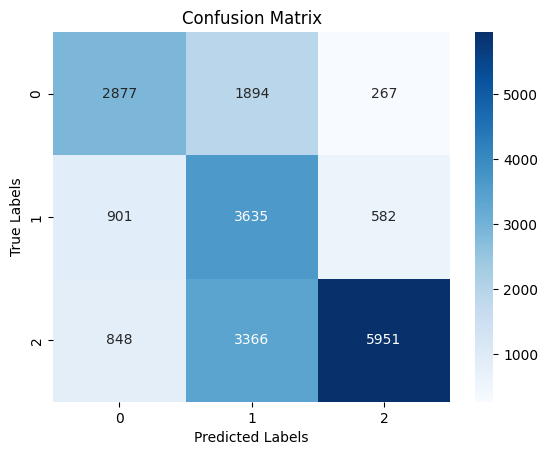

In [ ]:
show_results(model, y_test, y_pred)

## DecisionTreeClassifier

In [ ]:
# Create a Decision Tree classifier
model = DecisionTreeClassifier(max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Precision: 0.6894367823734443
Recall: 0.666355002214458
F-measure: 0.6703805979398068
Accuracy: 0.666355002214458 


Cross validation:  0.659541194536353


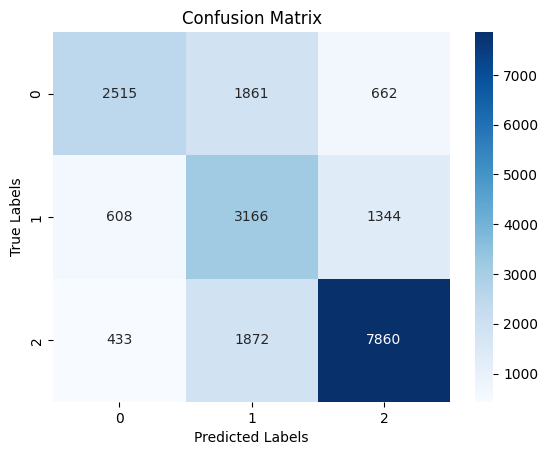

In [ ]:
show_results(model, y_test, y_pred)

## RandomForestClassifier

In [ ]:
# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators = 200, max_depth = 3)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Precision: 0.6575381097027596
Recall: 0.6608434624280302
F-measure: 0.656266216167079
Accuracy: 0.6608434624280302 


Cross validation:  0.656972448016423


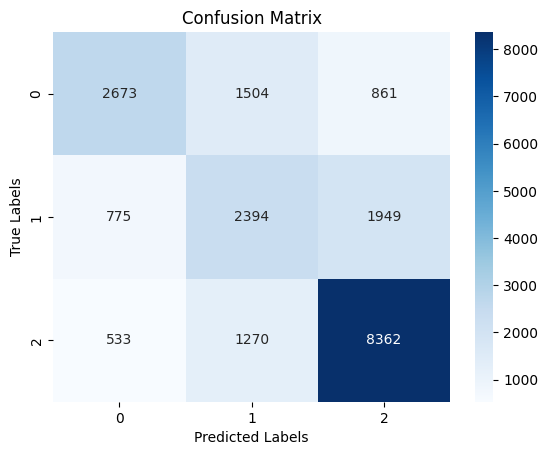

In [ ]:
show_results(model, y_test, y_pred)

## KNeighborsClassifier

In [ ]:
# Create a K-Nearest Neighbors classifier
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Precision: 0.8243476011431933
Recall: 0.8240244082476256
F-measure: 0.8241151960880702
Accuracy: 0.8240244082476256 


Cross validation:  0.7716814913938376


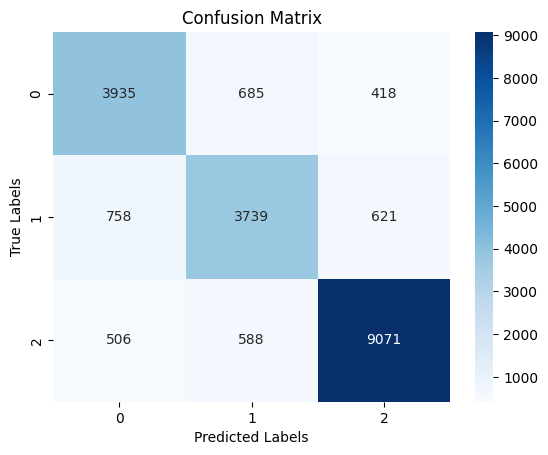

In [ ]:
show_results(model, y_test, y_pred)

## K-Means

In [ ]:
# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit the label encoder on y_test and transform the labels
y_test_encoded = label_encoder.fit_transform(y_test)

# Perform K-means clustering on X_test
model = KMeans(n_init = 'auto', n_clusters=3, random_state=42)
model.fit(X_train)

# Predict the clusters for X_test
test_clusters = model.predict(X_test)

# Find the majority label for each cluster
cluster_labels = []
for cluster in np.unique(test_clusters):
    cluster_indices = np.where(test_clusters == cluster)[0]
    cluster_labels.append(np.bincount(y_test_encoded[cluster_indices]).argmax())

# Map the cluster labels to the original labels
predicted_labels = [cluster_labels[cluster] for cluster in test_clusters]

# Inverse transform the predicted labels to their original form
y_pred = label_encoder.inverse_transform(predicted_labels)

Precision: 0.4460668527914699
Recall: 0.5943113035775799
F-measure: 0.5028596436461978
Accuracy: 0.5943113035775799 




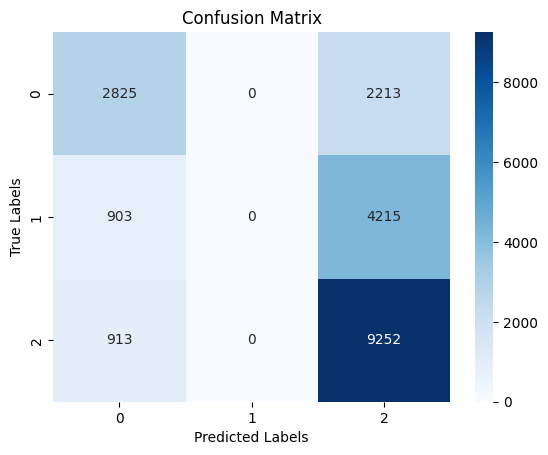

In [ ]:
show_results(model, y_test, y_pred)